# Урок 6. Градиентный бустинг

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
X.shape

(442, 10)

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

Напишем функцию, реализующую предсказание в градиентном бустинге.

In [6]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta*coef*alg.predict([x])[0] for alg, coef in zip(trees_list,coef_list)]) for x in X])


В качестве функционала ошибки будем использовать среднеквадратичную ошибку. Реализуем соответствующую функицию.

In [7]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [8]:
def deriv(y, z):
    return 2*(y - z)

Реализуем функцию обучения градиентного бустинга.

In [9]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            pred = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, deriv(y_train, pred))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

Теперь обучим несколько моделей с разными параметрами и исследуем их поведение.

In [10]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

# %%time
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [11]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [12]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 2881.8438628223666
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 7408.988451631921


Построим графики зависимости ошибки на обучающей и тестовой выборках от числа итераций.

In [13]:
import matplotlib.pyplot as plt

In [14]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

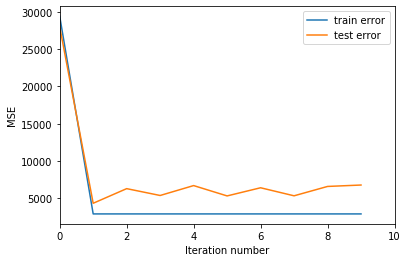

In [15]:
get_error_plot(n_trees, train_errors, test_errors)

Такой результат не является удовлетворительным

In [16]:
%%time
eta = 0.1
n_trees = 20
max_depth = 10

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Wall time: 10.9 s


In [17]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 20 деревьев глубиной 10     с шагом 0.1 на тренировочной выборке: 465.1427527836843
Ошибка алгоритма из 20 деревьев глубиной 10     с шагом 0.1 на тестовой выборке: 4711.538320724479


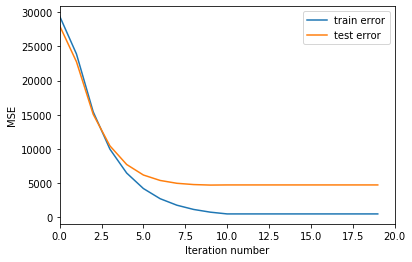

In [18]:
get_error_plot(n_trees, train_errors, test_errors)

In [19]:
%%time
eta = 0.1
n_trees = 20
max_depth = 7

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Wall time: 10.8 s


In [20]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 20 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 670.9703217354202
Ошибка алгоритма из 20 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 4058.11820569421


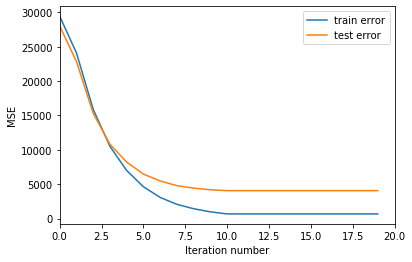

In [21]:
get_error_plot(n_trees, train_errors, test_errors)

In [22]:
%%time
eta = 0.1
n_trees = 20
max_depth = 5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Wall time: 10.9 s


In [23]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 1424.8355093243172
Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3472.2997610479374


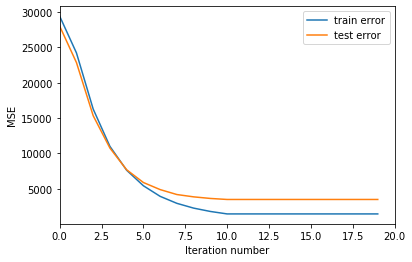

In [24]:
get_error_plot(n_trees, train_errors, test_errors)

### Домашнее задание:  
1. Для реализованной модели построить графики зависимости ошибки от количества деревьев в ансамбле 

In [25]:
# errors depending on number of trees from 1 to 20
errors_num_trees = []

# Максимальная глубина деревьев
max_depth = 5
# Шаг
eta = 0.1
num_trees =[]
for n in range(20):
    coefs=[1]*n
    trees, train_errors, test_errors = gb_fit(n+1, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    test_pred = gb_predict(X_test, trees, coefs, eta)
    errors_num_trees.append(mean_squared_error(y_test, test_pred))
    num_trees.append(n+1)
    

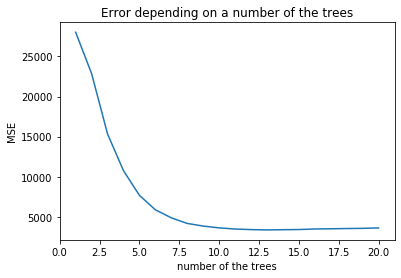

In [26]:
plt.plot(num_trees, errors_num_trees)
plt.title('Error depending on a number of the trees')
plt.xlabel('number of the trees')
plt.ylabel('MSE')
plt.xlim(0, 21)
plt.show()

**и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.**  


In [27]:
# errors depending on max_depth from 1 to 15
errors_max_depth = []
# Число деревьев в ансамбле
n_trees = 20
# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees
# Шаг
eta = 0.1

max_depth = []
for mtd in range(15):
    trees, train_errors, test_errors = gb_fit(n_trees, mtd+1, X_train, X_test, y_train, y_test, coefs, eta)
    test_pred = gb_predict(X_test, trees, coefs, eta)
    errors_max_depth.append(mean_squared_error(y_test, test_pred))
    max_depth.append(mtd+1)

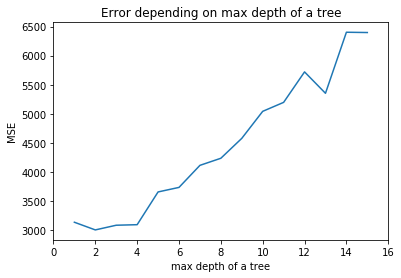

In [28]:
plt.plot(max_depth, errors_max_depth)
plt.title('Error depending on max depth of a tree')
plt.xlabel('max depth of a tree')
plt.ylabel('MSE')
plt.xlim(0, 16)
plt.show()

**checking again**

In [29]:
%%time
eta = 0.1
n_trees = 20
max_depth = 5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Wall time: 15 s


In [30]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 397.5927394860706
Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3654.654105869036


**Вывод**
Видимо,лучший параметр глубины дерева для данного датасета - 2. Дальше деревья слишком подстраиваются под конкретный набор данных при сплитах

2. Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.